# Syntactic Parsing

Syntactic parsing is the process of analyzing the grammatical structure of a sentence to determine the relationships between words. It involves breaking down a sentence into its constituent parts and identifying how those parts relate to each other.

Syntactic parsing is essential in NLP because it helps computers understand the structure of human language. It aids in tasks like information extraction, sentiment analysis, and machine translation.

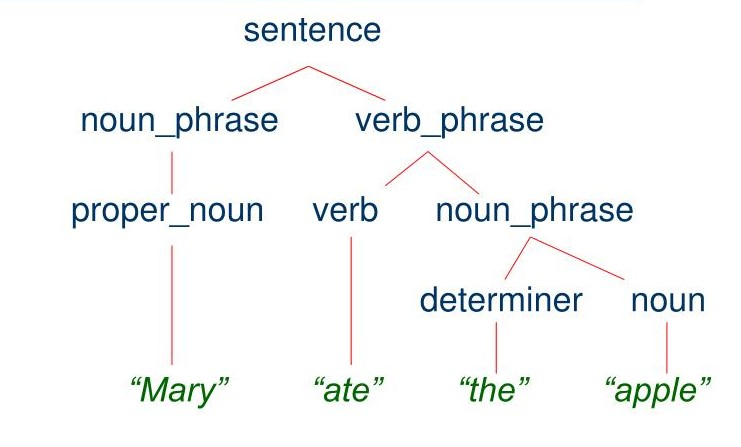

A sentence is structured as follows:

- Sentence = S = Noun Phrase + Verb Phrase + Preposition Phrase

- S = NP + VP + PP

The different word groups that exist according to English grammar rules are:

- Noun Phrase(NP): Determiner + Nominal Nouns = DET + Nominal
- Verb Phrase (VP): Verb + range of combinations
- Prepositional Phrase (PP): Preposition + Noun Phrase = P + NP

#syntactic parsing using NLTK

In [ ]:
#Import the necessary libraries and download the NLTK data:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')
nltk.download('book_grammars')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package book_grammars to /root/nltk_data...
[nltk_data]   Unzipping grammars/book_grammars.zip.


True

In [ ]:
#Tokenize your text into sentences and words:
from nltk.tokenize import sent_tokenize, word_tokenize

text = "the cat chased a dog"

words = word_tokenize(text)
words

['the', 'cat', 'chased', 'a', 'dog']

In [ ]:
#Perform part-of-speech tagging to assign grammatical tags to each word:
from nltk import pos_tag

pos_tagged_words = pos_tag(words)
pos_tagged_words

[('the', 'DT'), ('cat', 'NN'), ('chased', 'VBD'), ('a', 'DT'), ('dog', 'NN')]

In [ ]:
#Use a parser to perform syntactic parsing.
#The Natural Language Toolkit provides parsers like the ChartParser and the EarleyChartParser.

from nltk.parse.chart import ChartParser
from nltk.grammar import CFG

# Define a simple context-free grammar for parsing
grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N
    VP -> V NP
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog'
    V -> 'chased' | 'ate'
""")

# Create a parser
parser = ChartParser(grammar)

# Parse the sentences
for tree in parser.parse(words):
  tree.pretty_print()

# Extract and print the parse tree
parse_tree = list(parser.parse(words))
print("\nParse Tree:")
print(parse_tree)


              S               
      ________|_____           
     |              VP        
     |         _____|___       
     NP       |         NP    
  ___|___     |      ___|___   
Det      N    V    Det      N 
 |       |    |     |       |  
the     cat chased  a      dog


Parse Tree:
[Tree('S', [Tree('NP', [Tree('Det', ['the']), Tree('N', ['cat'])]), Tree('VP', [Tree('V', ['chased']), Tree('NP', [Tree('Det', ['a']), Tree('N', ['dog'])])])])]


#syntactic parsing and chunking.

In [ ]:
#Import NLTK and download necessary resources:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
#Tokenize and part-of-speech tag your text.
from nltk.tokenize import word_tokenize
from nltk import pos_tag

text = "John and Mary are going to the park."
tokens = word_tokenize(text)
pos_tags = pos_tag(tokens)
pos_tags

[('John', 'NNP'),
 ('and', 'CC'),
 ('Mary', 'NNP'),
 ('are', 'VBP'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('park', 'NN'),
 ('.', '.')]

In [ ]:
#Define a chunking grammar to extract specific phrases or chunks

from nltk.chunk import RegexpParser

chunk_grammar = r"""
    NP: {<DT>?<JJ>*<NN>} # Noun Phrase
    """
chunk_parser = RegexpParser(chunk_grammar)

#perform chunking on your tokenized and tagged text:
tree = chunk_parser.parse(pos_tags)

#You can visualize the parsed tree structure using NLTK:
#tree.draw()


In [ ]:
#To extract the chunks from the tree
noun_phrases = []
for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
    noun_phrases.append(' '.join(word for word, pos in subtree.leaves()))

print(noun_phrases)

['the park']


#Task1

#Task2

END